<a href="https://colab.research.google.com/github/Titankhoa/ThucHanhXuLyAnhSo/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Bai01

In [ ]:
!pip install opencv-python-headless matplotlib


In [ ]:
import os
from google.colab import files

os.makedirs('exercise', exist_ok=True)
uploaded = files.upload()

for fn in uploaded.keys():
    os.rename(fn, f"exercise/{fn}")


Saving ha-long-bay-in-vietnam.jpg to ha-long-bay-in-vietnam.jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_inverse(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    return np.array(255 * (img / 255) ** (1/gamma), dtype='uint8')

def log_transform(img):
    return np.array(255 * np.log1p(img) / np.log1p(255), dtype='uint8')

def histogram_equalization(img):
    return cv2.equalizeHist(img)

def contrast_stretching(img):
    a, b = np.min(img), np.max(img)
    return np.array(255 * (img - a) / (b - a), dtype='uint8')

functions1 = {
    'I': image_inverse,
    'G': gamma_correction,
    'L': log_transform,
    'H': histogram_equalization,
    'C': contrast_stretching
}


In [ ]:
def process_images1(folder='exercise', key='I'):
    os.makedirs('output1', exist_ok=True)
    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Không thể đọc ảnh: {file}")
            continue
        result = functions1[key](img)
        out_path = os.path.join('output1', f"{key}_{file}")
        cv2.imwrite(out_path, result)
        print(f"Đã lưu: {out_path}")


In [ ]:
process_images1(key='L')


Đã lưu: output1/L_quang_ninh.jpg
Đã lưu: output1/L_balloons_noisy.png
Đã lưu: output1/L_pagoda.jpg
Đã lưu: output1/L_ha-long-bay-in-vietnam.jpg


####*Bai_2*

In [ ]:
def butterworth_filter(shape, cutoff, order, highpass=True):
    P, Q = shape
    u = np.arange(P) - P / 2
    v = np.arange(Q) - Q / 2
    U, V = np.meshgrid(u, v, sparse=False, indexing='ij')
    D = np.sqrt(U**2 + V**2)

    epsilon = 1e-5
    D = np.where(D == 0, epsilon, D)

    if highpass:
        return 1 / (1 + (cutoff / D) ** (2 * order))
    else:
        return 1 / (1 + (D / cutoff) ** (2 * order))


In [ ]:
def fft_transform(img):
    dft = np.fft.fftshift(np.fft.fft2(img))
    magnitude_spectrum = 20 * np.log(np.abs(dft) + 1)
    return np.array(magnitude_spectrum / np.max(magnitude_spectrum) * 255, dtype='uint8')

def apply_butterworth(img, cutoff=30, order=2, highpass=False):
    dft = np.fft.fftshift(np.fft.fft2(img))
    H = butterworth_filter(img.shape, cutoff, order, highpass)
    G = H * dft
    img_back = np.abs(np.fft.ifft2(np.fft.ifftshift(G)))
    return np.array(img_back / np.max(img_back) * 255, dtype='uint8')

functions2 = {
    'F': fft_transform,
    'L': lambda img: apply_butterworth(img, highpass=False),
    'H': lambda img: apply_butterworth(img, highpass=True)
}


In [ ]:
def process_images2(folder='exercise', key='F'):
    import matplotlib.pyplot as plt

    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Không thể đọc ảnh: {file}")
            continue

        result = functions2[key](img)


        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.title("Ảnh gốc")
        plt.imshow(img, cmap='gray')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        title_map = {'F': 'FFT', 'L': 'Butterworth Lowpass', 'H': 'Butterworth Highpass'}
        plt.title(f"Kết quả: {title_map.get(key, key)}")
        plt.imshow(result, cmap='gray')
        plt.axis('off')

        plt.suptitle(f"File: {file}")
        plt.show()


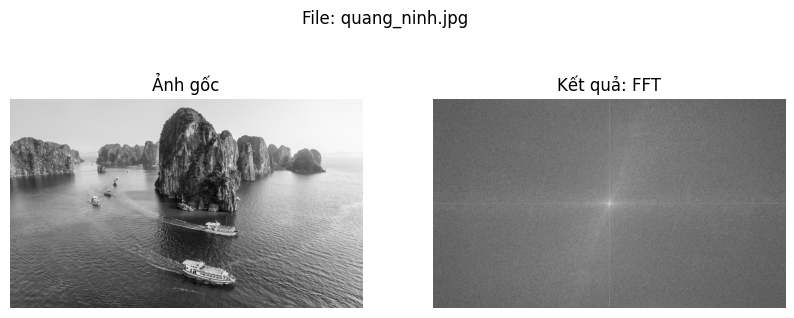

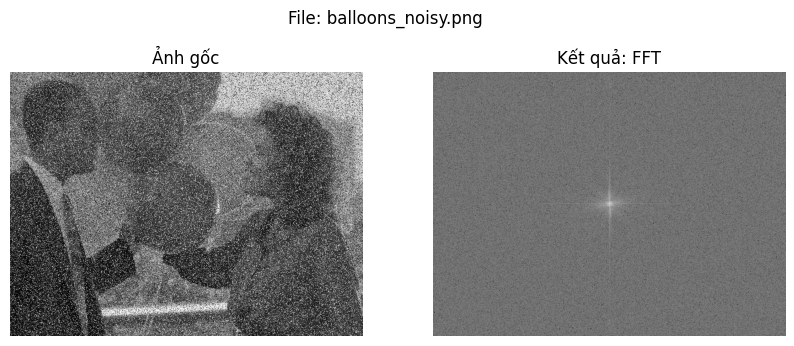

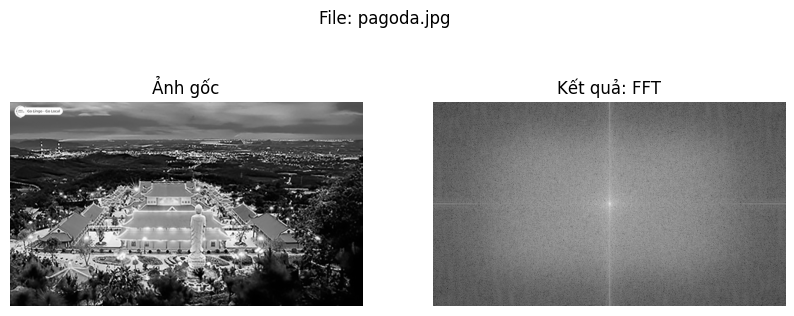

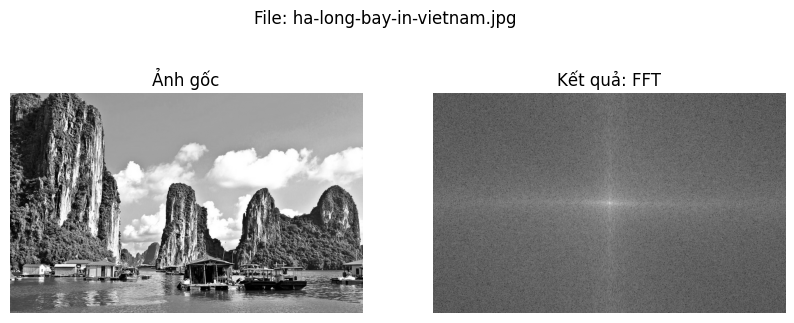

In [ ]:
process_images2(key='F')


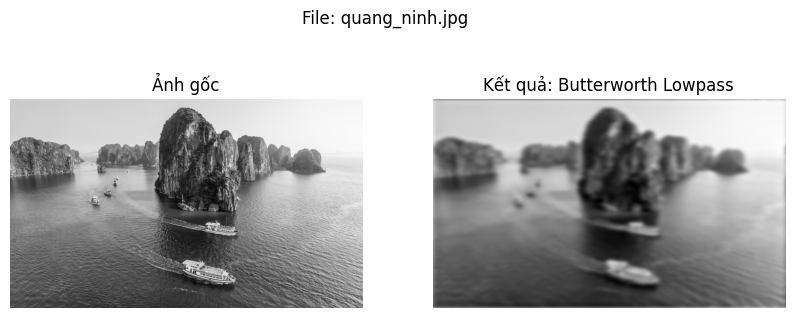

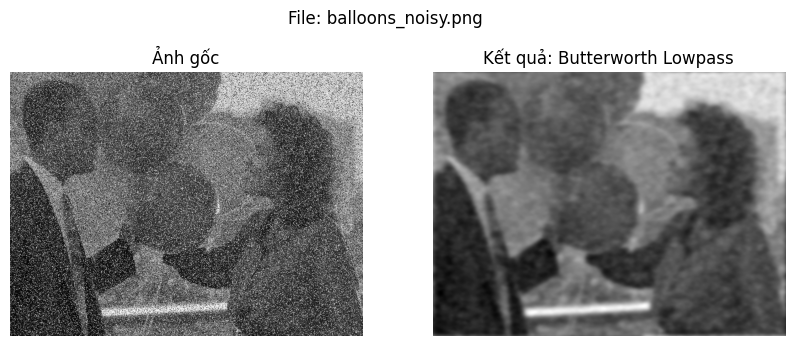

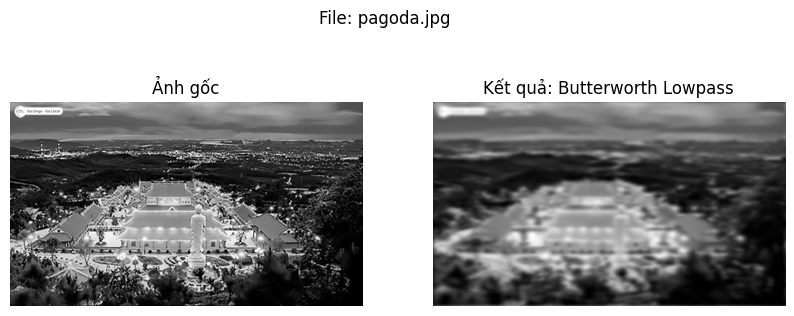

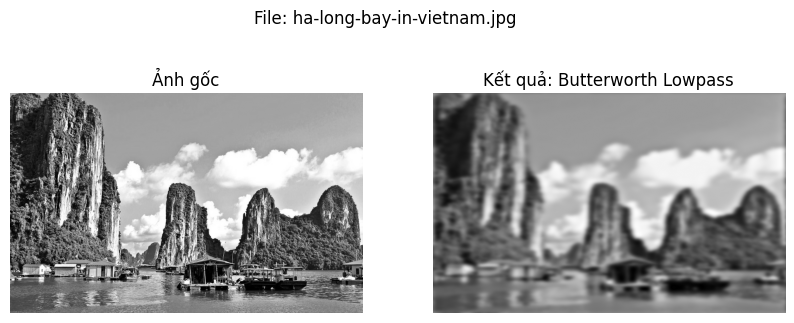

In [ ]:
process_images2(key='L')


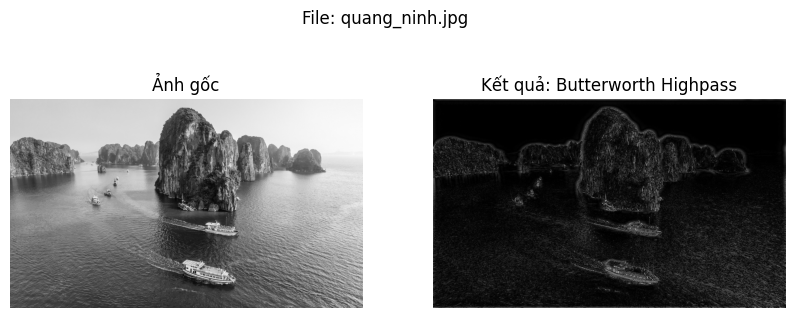

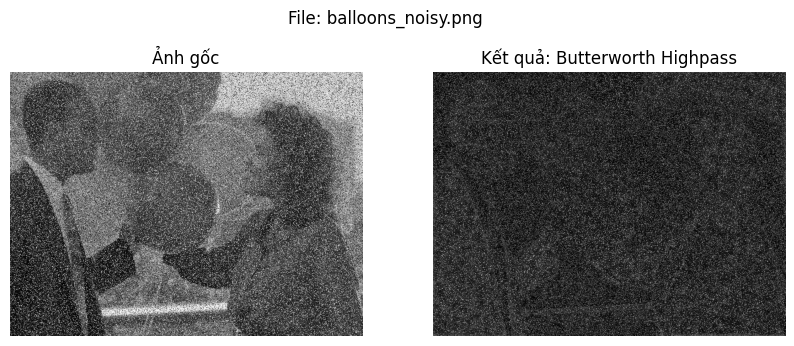

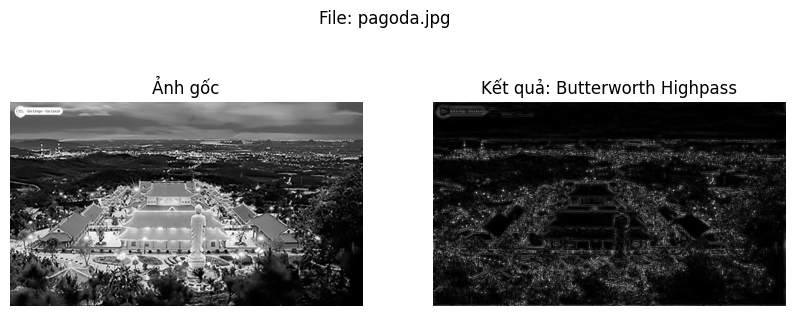

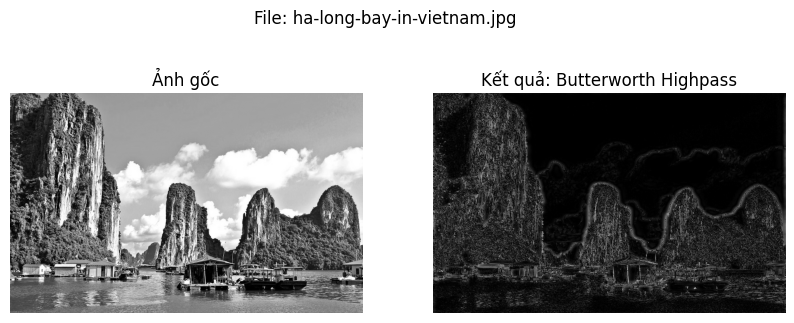

In [ ]:
process_images2(key='H')


###BAI_03


In [ ]:
def process_random_rgb_and_method1(folder='exercise'):
    import matplotlib.pyplot as plt

    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        img_color = cv2.imread(path)
        if img_color is None:
            print(f"Không thể đọc ảnh: {file}")
            continue

        method_key = random.choice(list(functions1.keys()))
        print(f"Ảnh {file} - phương pháp: {method_key}")

        channels = cv2.split(img_color)
        processed_channels = [functions1[method_key](ch) for ch in channels]
        result = cv2.merge(processed_channels)

        # Chuyển BGR sang RGB để hiển thị đúng màu trong matplotlib
        img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
        result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

        # Hiển thị ảnh
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.title("Ảnh gốc")
        plt.imshow(img_rgb)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title(f"Ảnh xử lý (method: {method_key})")
        plt.imshow(result_rgb)
        plt.axis('off')

        plt.suptitle(f"File: {file}")
        plt.show()


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random  # <- DÒNG NÀY BẮT BUỘC PHẢI CÓ


Ảnh quang_ninh.jpg - phương pháp: L


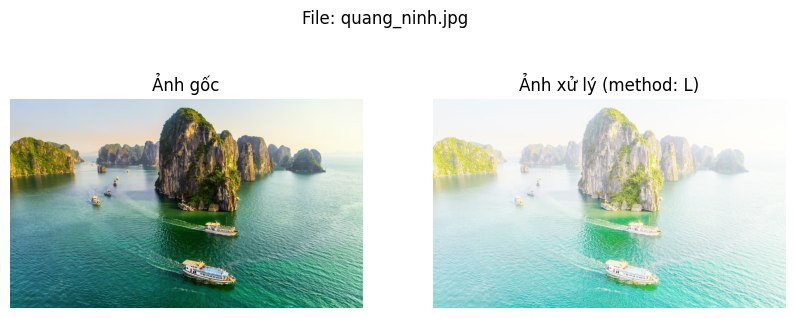

Ảnh balloons_noisy.png - phương pháp: H


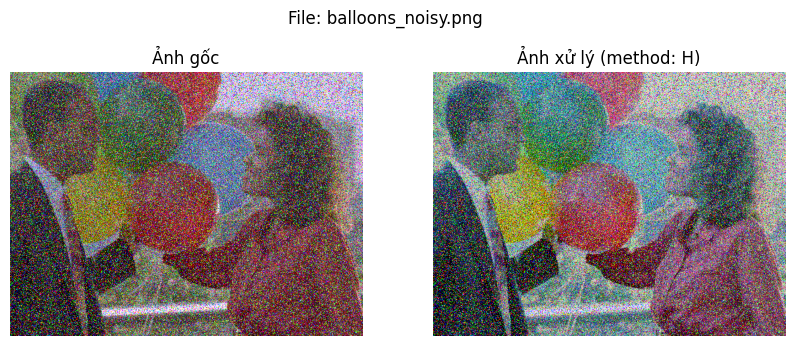

Ảnh pagoda.jpg - phương pháp: G


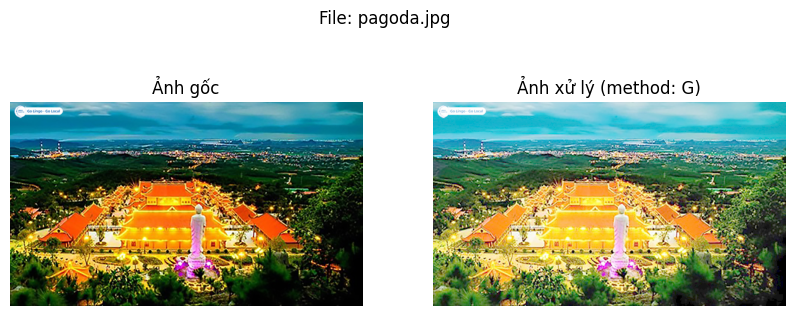

Ảnh ha-long-bay-in-vietnam.jpg - phương pháp: C


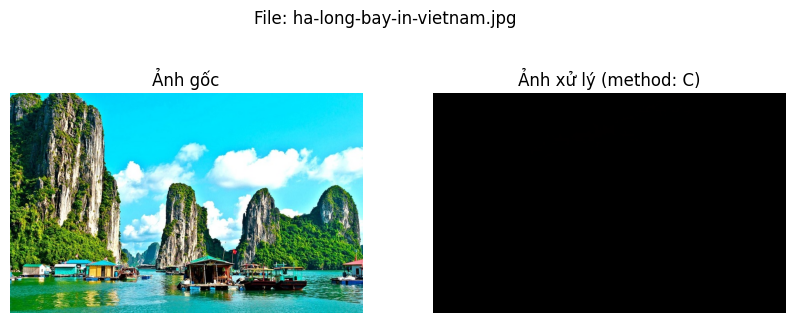

In [ ]:
process_random_rgb_and_method1()


####Bai_04


In [ ]:
def process_random_rgb_and_method2(folder='exercise'):
    import matplotlib.pyplot as plt
    import random  # đảm bảo đã import

    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        img_color = cv2.imread(path)
        if img_color is None:
            print(f"Không thể đọc ảnh: {file}")
            continue

        method_key = random.choice(list(functions2.keys()))
        print(f"Ảnh {file} - phương pháp: {method_key}")

        channels = cv2.split(img_color)
        processed_channels = []

        for ch in channels:
            result = functions2[method_key](ch)
            if method_key == 'L':
                result = min_filter(result)
            elif method_key == 'H':
                result = max_filter(result)
            processed_channels.append(result)

        result_img = cv2.merge(processed_channels)

        # Chuyển BGR sang RGB để hiển thị đúng màu
        img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
        result_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

        # Hiển thị ảnh gốc và ảnh kết quả
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.title("Ảnh gốc")
        plt.imshow(img_rgb)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title(f"Kết quả (method: {method_key})")
        plt.imshow(result_rgb)
        plt.axis('off')

        plt.suptitle(f"File: {file}")
        plt.show()


Ảnh quang_ninh.jpg - phương pháp: L


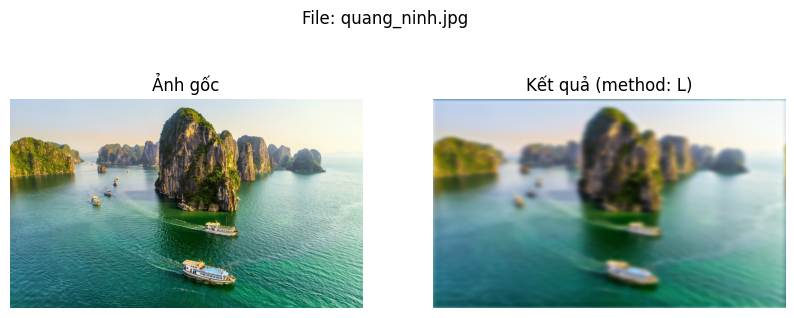

Ảnh balloons_noisy.png - phương pháp: F


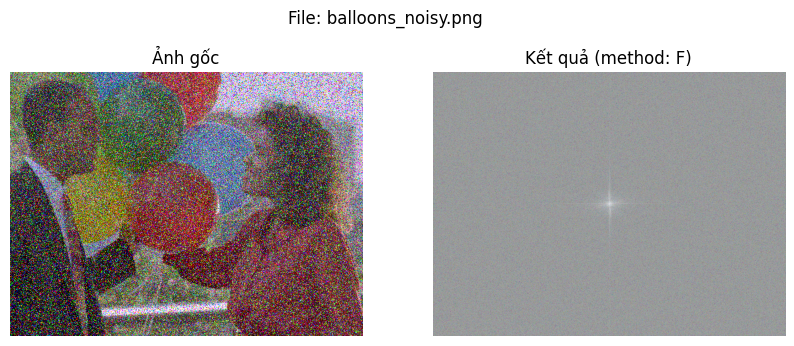

Ảnh pagoda.jpg - phương pháp: H


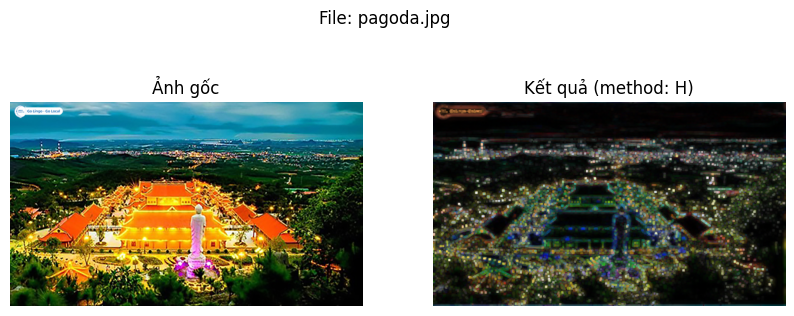

Ảnh ha-long-bay-in-vietnam.jpg - phương pháp: L


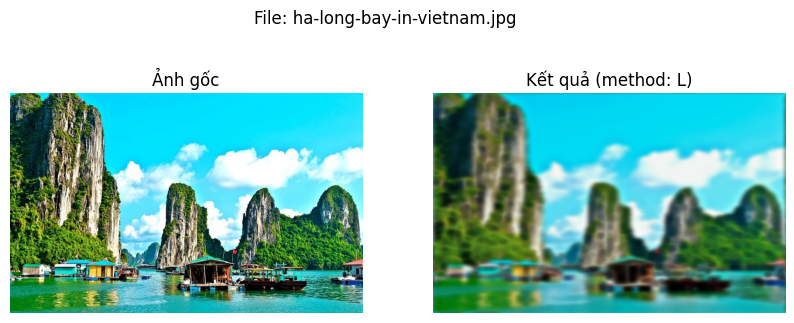

In [ ]:
process_random_rgb_and_method2()
